In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score,classification_report, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [ ]:
# Load the dataset (replace 'breast_cancer_data.csv' with your actual file)
df = pd.read_csv("/content/breastcanupdtnew.csv")
df.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,...,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,0.11840,0.27760,0.3001,0.2419,0.07871,1.0950,0.9053,...,0.04904,0.05373,0.01587,0.03003,0.006193,0.1622,0.6656,0.7119,0.4601,0.11890
1,M,20.57,17.77,0.08474,0.07864,0.0869,0.1812,0.05667,0.5435,0.7339,...,0.01308,0.01860,0.01340,0.01389,0.003532,0.1238,0.1866,0.2416,0.2750,0.08902
2,M,19.69,21.25,0.10960,0.15990,0.1974,0.2069,0.05999,0.7456,0.7869,...,0.04006,0.03832,0.02058,0.02250,0.004571,0.1444,0.4245,0.4504,0.3613,0.08758
3,M,11.42,20.38,0.14250,0.28390,0.2414,0.2597,0.09744,0.4956,1.1560,...,0.07458,0.05661,0.01867,0.05963,0.009208,0.2098,0.8663,0.6869,0.6638,0.17300
4,M,20.29,14.34,0.10030,0.13280,0.1980,0.1809,0.05883,0.7572,0.7813,...,0.02461,0.05688,0.01885,0.01756,0.005115,0.1374,0.2050,0.4000,0.2364,0.07678


#Data preprocessing

In [ ]:
#checking for the missing values
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
symmetry_mean,0
fractal_dimension_mean,0
radius_se,0
texture_se,0


In [ ]:
# Select relevant columns for features (X)
X = df[['radius_mean', 'texture_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'symmetry_mean',
        'fractal_dimension_mean', 'radius_se', 'texture_se',
        'smoothness_se', 'compactness_se', 'concavity_se',
        'concave points_se', 'symmetry_se', 'fractal_dimension_se',
        'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'symmetry_worst', 'fractal_dimension_worst']]

In [ ]:
# Convert the diagnosis column to binary values: 1 for Malignant (M), 0 for Benign (B)
y = df['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **Visualization**

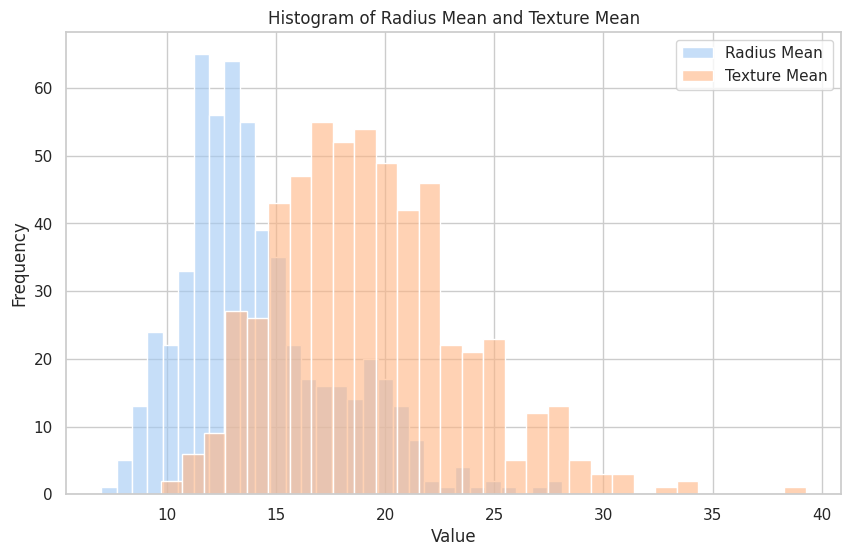

In [ ]:
#Histogram
radius_mean = df['radius_mean']
texture_mean = df['texture_mean']
combined_data = pd.DataFrame({'Radius Mean': radius_mean, 'Texture Mean': texture_mean})
sns.set(style="whitegrid")
palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
sns.histplot(combined_data['Radius Mean'], bins=30, kde=False, color=palette[0], label='Radius Mean', alpha=0.6)
sns.histplot(combined_data['Texture Mean'], bins=30, kde=False, color=palette[1], label='Texture Mean', alpha=0.6)
plt.title('Histogram of Radius Mean and Texture Mean')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

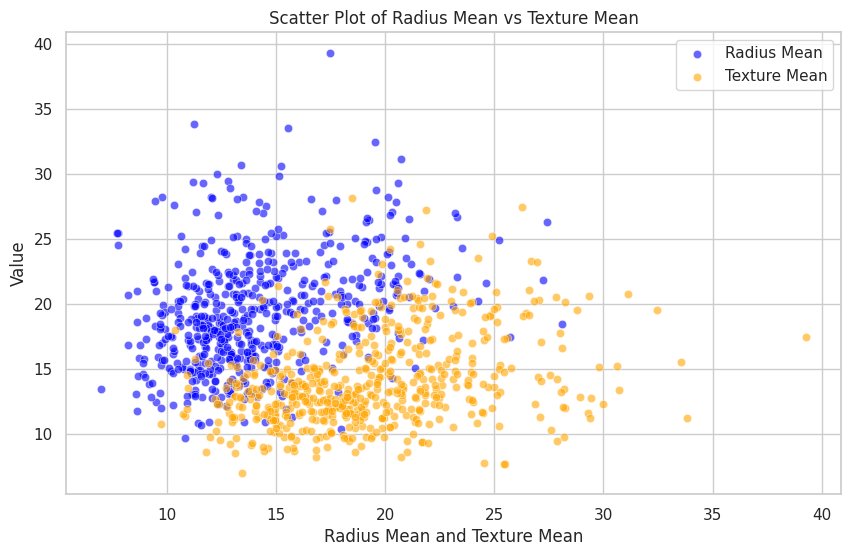

In [ ]:
#Scatter plot
radius_mean = df['radius_mean']
texture_mean = df['texture_mean']
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x=radius_mean, y=texture_mean, data=df, color='blue', alpha=0.6, label='Radius Mean')
sns.scatterplot(x=texture_mean, y=radius_mean, data=df, color='orange', alpha=0.6, label='Texture Mean')
plt.title('Scatter Plot of Radius Mean vs Texture Mean')
plt.xlabel('Radius Mean and Texture Mean')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

### **`Feature Selection`**

  diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         M        17.99         10.38          0.11840           0.27760   
1         M        20.57         17.77          0.08474           0.07864   
2         M        19.69         21.25          0.10960           0.15990   
3         M        11.42         20.38          0.14250           0.28390   
4         M        20.29         14.34          0.10030           0.13280   

   concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.3001         0.2419                 0.07871     1.0950   
1          0.0869         0.1812                 0.05667     0.5435   
2          0.1974         0.2069                 0.05999     0.7456   
3          0.2414         0.2597                 0.09744     0.4956   
4          0.1980         0.1809                 0.05883     0.7572   

   texture_se  ...  compactness_se  concavity_se  concave points_se  \
0      0.9053  ...         0.04904     

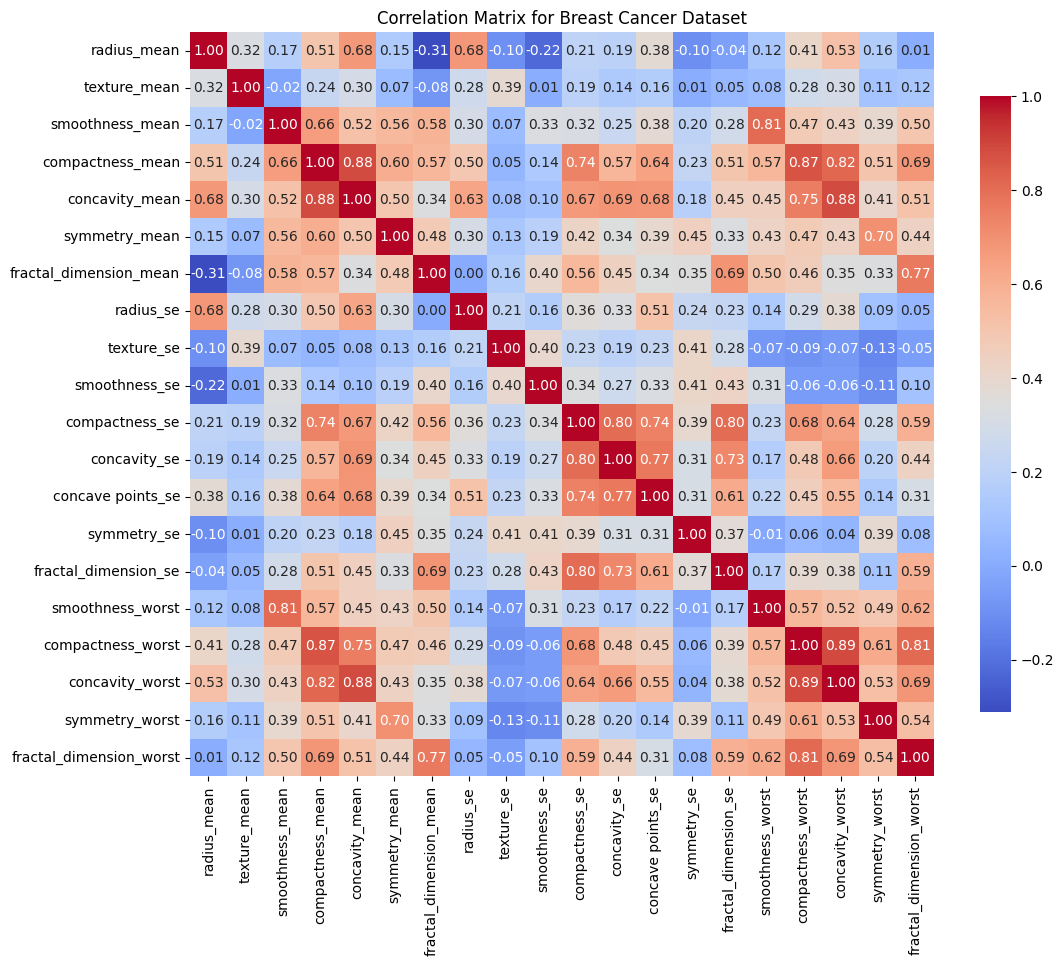

Features to be removed due to high correlation:
[]
Cleaned dataset:
  diagnosis  radius_mean  texture_mean  smoothness_mean  compactness_mean  \
0         M        17.99         10.38          0.11840           0.27760   
1         M        20.57         17.77          0.08474           0.07864   
2         M        19.69         21.25          0.10960           0.15990   
3         M        11.42         20.38          0.14250           0.28390   
4         M        20.29         14.34          0.10030           0.13280   

   concavity_mean  symmetry_mean  fractal_dimension_mean  radius_se  \
0          0.3001         0.2419                 0.07871     1.0950   
1          0.0869         0.1812                 0.05667     0.5435   
2          0.1974         0.2069                 0.05999     0.7456   
3          0.2414         0.2597                 0.09744     0.4956   
4          0.1980         0.1809                 0.05883     0.7572   

   texture_se  ...  compactness_se  concav

In [ ]:
#correlation after elimination
print(df.head())
numeric_data = df.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Breast Cancer Dataset')
plt.show()
threshold = 0.9
upper = correlation_matrix.where(np.triu(np.ones_like(correlation_matrix), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column].abs() > threshold)]
print("Features to be removed due to high correlation:")
print(to_drop)
data_cleaned = df.drop(columns=to_drop)
print("Cleaned dataset:")
print(data_cleaned.head())




#Feature scaling (standardization)

In [ ]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training and Evaluation

**SUPPORT VECTOR MACHINE WITH OPTIMIZATION**

In [ ]:
def train_and_evaluate_svm(kernel_type):
    print(f"\nSVM with {kernel_type} kernel")

    # Train the SVM model with specified kernel
    svm_classifier = SVC(kernel=kernel_type, random_state=42)
    svm_classifier.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = svm_classifier.predict(X_test_scaled)

    # Output Confusion Matrix and Classification Report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Visualize Confusion Matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {kernel_type} Kernel')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#SVM with Linear Kernel


SVM with linear kernel
Confusion Matrix:
[[70  1]
 [ 1 42]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



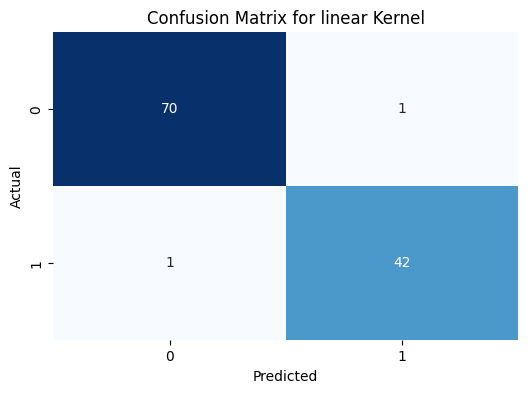

In [ ]:
train_and_evaluate_svm('linear')

#SVM with Polynomial Kernel


SVM with poly kernel
Confusion Matrix:
[[71  0]
 [17 26]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.89        71
           1       1.00      0.60      0.75        43

    accuracy                           0.85       114
   macro avg       0.90      0.80      0.82       114
weighted avg       0.88      0.85      0.84       114



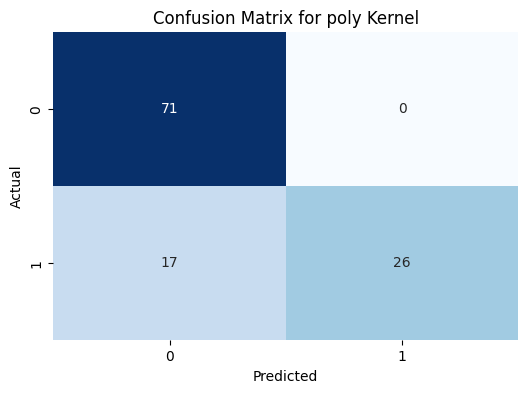

In [ ]:
train_and_evaluate_svm('poly')

In [ ]:
# Output for Confusion Matrix and Classification Report for the best model
print("\nConfusion Matrix for the best SVM model:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report for the best SVM model:")
print(classification_report(y_test, y_pred))


Confusion Matrix for the best SVM model:
[[70  1]
 [ 7 36]]

Classification Report for the best SVM model:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        71
           1       0.97      0.84      0.90        43

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



In [ ]:
# Define hyperparameters to tune
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly'],  # Different kernels
    'degree': [2, 3, 4]  # Only applicable for polynomial kernel
}

In [ ]:
svm = SVC()

In [ ]:
# Set up GridSearchCV with SVM
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4],
                         'kernel': ['linear', 'poly']},
             scoring='accuracy')

In [ ]:
# Output the best parameters found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters found:  {'C': 0.1, 'degree': 2, 'kernel': 'linear'}
Best cross-validation score: 0.97


In [ ]:
# Use the best estimator (model) found by GridSearchCV
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
test_score = best_model.score(X_test_scaled, y_test)
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.96


#code for hyperplane:

In [ ]:
# Select only two features for visualization
X = df[['radius_mean', 'texture_mean']]

#Train the SVM model with a linear kernel

In [ ]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Get the separating hyperplane
w = svm_classifier.coef_[0]
b = svm_classifier.intercept_[0]

In [ ]:


# Create a meshgrid using the min and max values of the scaled features used during training
xx = np.linspace(X_train_scaled[:, 0].min(), X_train_scaled[:, 0].max(), 100) # Use the first feature from training data
yy = np.linspace(X_train_scaled[:, 1].min(), X_train_scaled[:, 1].max(), 100) # Use the second feature from training data
XX, YY = np.meshgrid(xx, yy)

num_features = X_train_scaled.shape[1]
xy = np.zeros((XX.ravel().shape[0], num_features))
xy[:, 0] = XX.ravel()
xy[:, 1] = YY.ravel()

Z = svm_classifier.decision_function(xy).reshape(XX.shape)

#Plot the decision boundary and margins

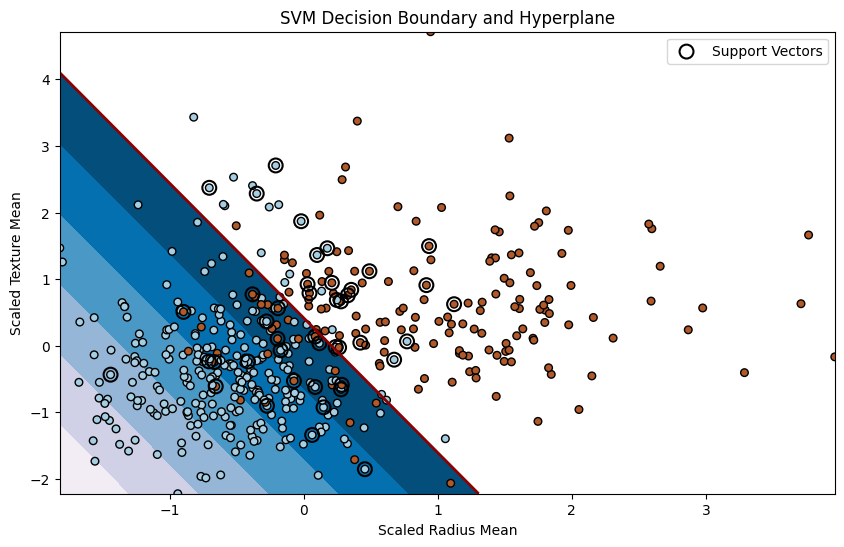

In [ ]:
plt.figure(figsize=(10, 6))
plt.contourf(XX, YY, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(XX, YY, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, s=30, cmap=plt.cm.Paired, edgecolors='k')

# Mark support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1], facecolors='none', edgecolors='k', s=100, linewidths=1.5, label='Support Vectors')

plt.title('SVM Decision Boundary and Hyperplane')
plt.xlabel('Scaled Radius Mean')
plt.ylabel('Scaled Texture Mean')
plt.legend(loc='upper right')
plt.show()

#Decision Tree and Optimization

In [ ]:
# Initialize and train the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy')
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

Accuracy: 0.956140350877193
Confusion Matrix:
[[68  3]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



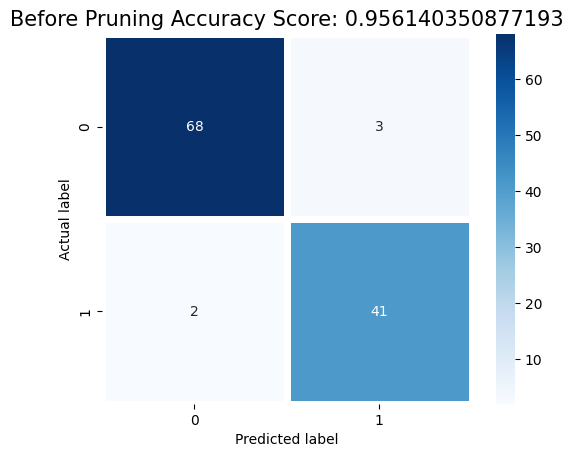

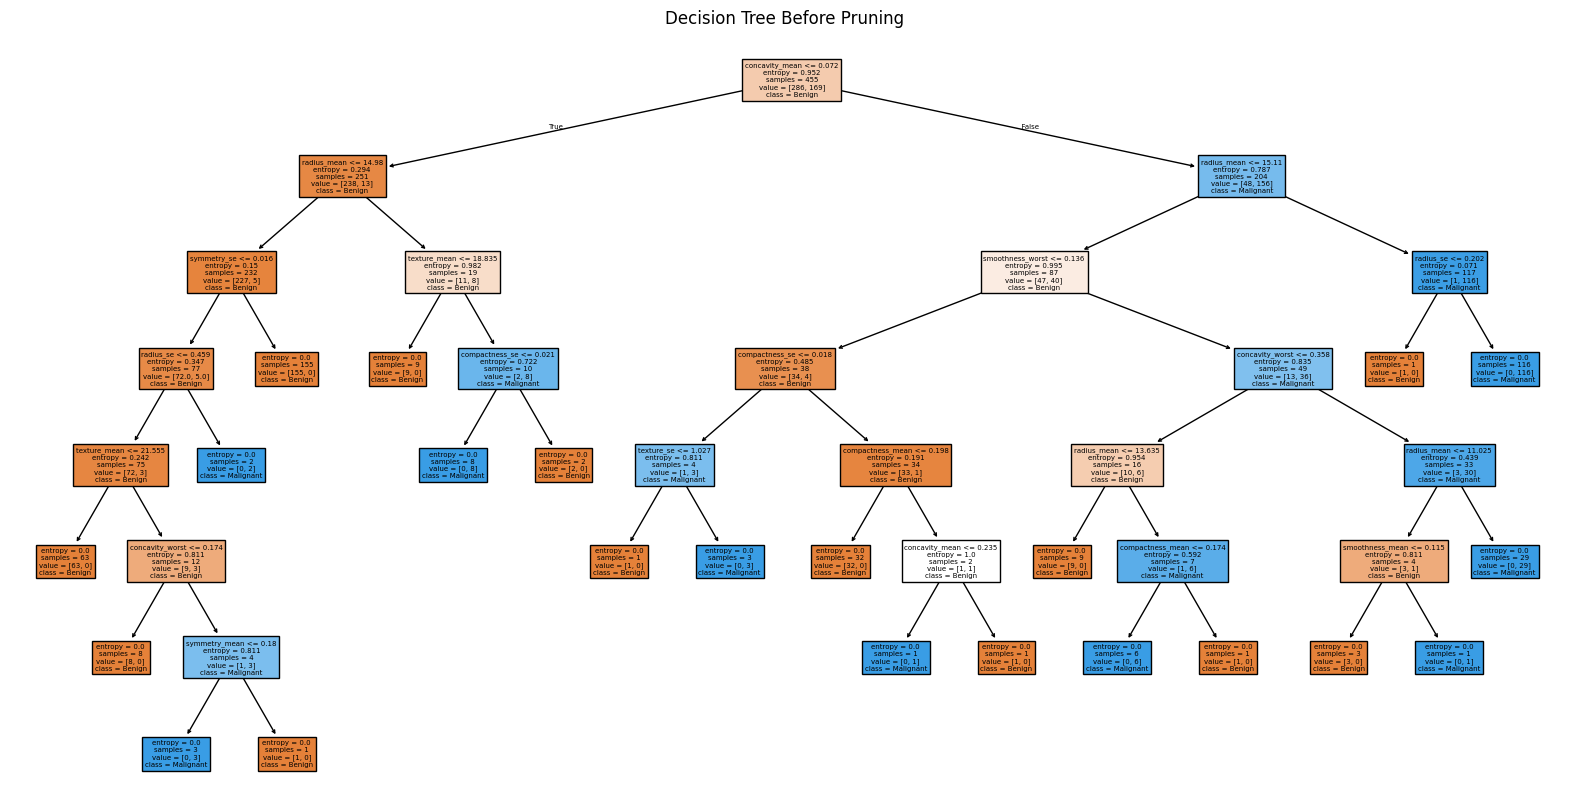

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Visualize the decision tree before pruning
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=5, square=True, cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Before Pruning Accuracy Score: {0}'.format(accuracy)
plt.title(all_sample_title, size=15)
plt.show()
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X_train.columns, class_names=['Benign', 'Malignant'])
plt.title("Decision Tree Before Pruning")
plt.show()

#Pruning

Accuracy of Decision Tree classifier on test set after pruning: 0.97
Classification Report after pruning
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



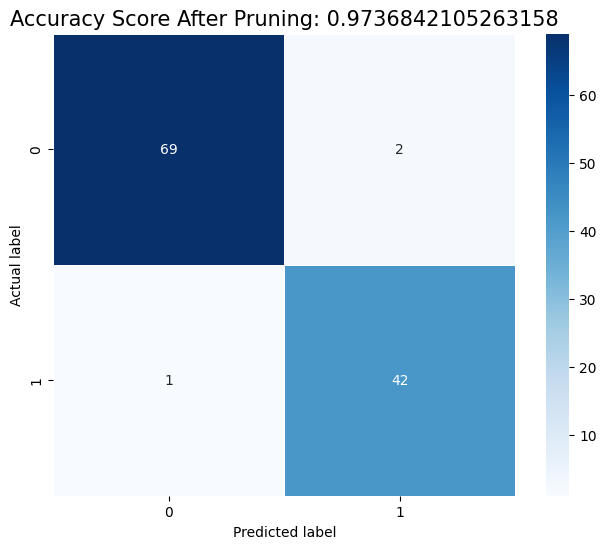

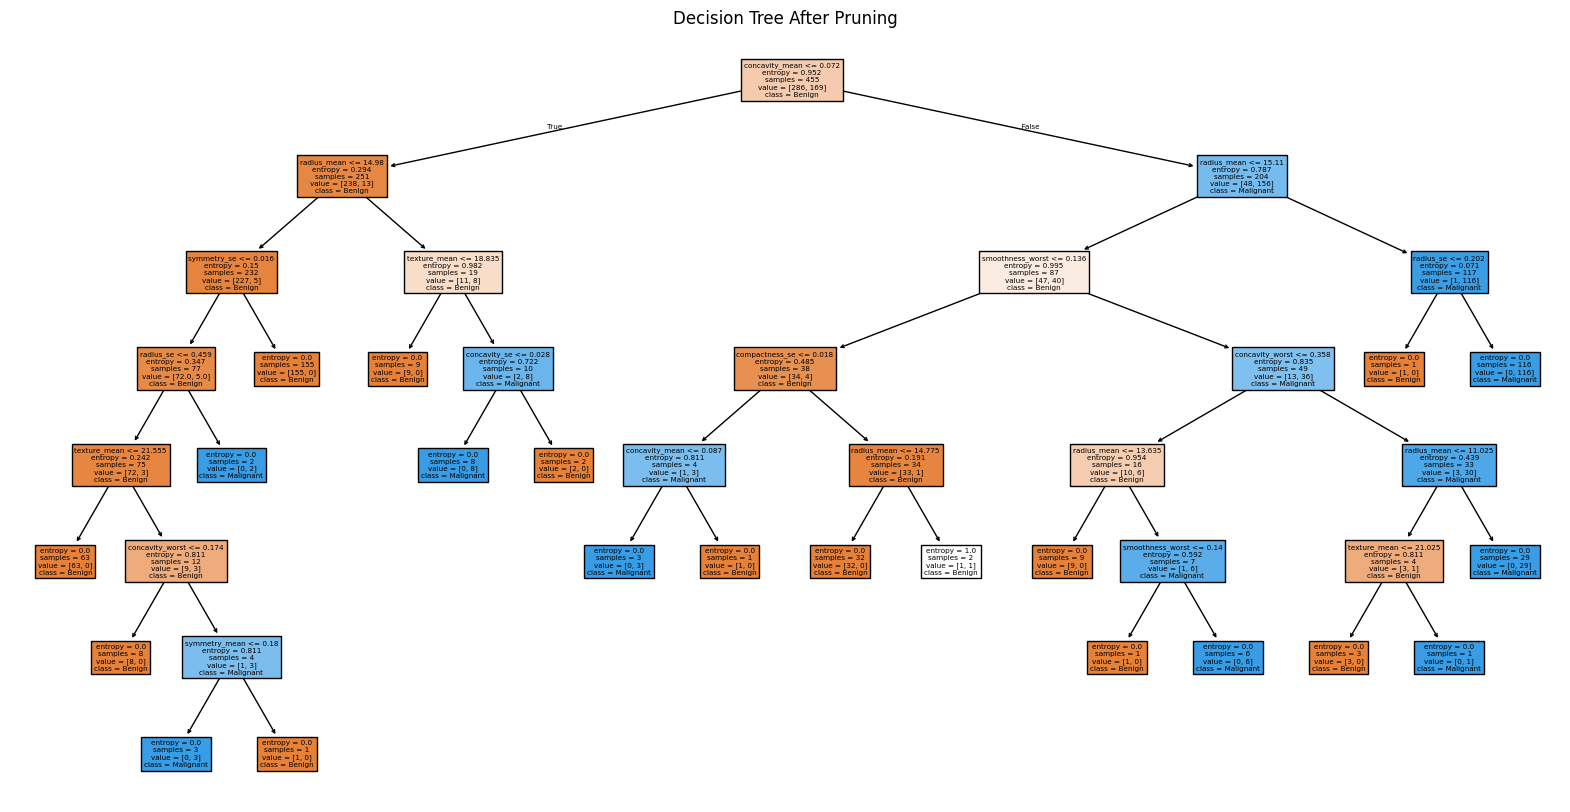

In [ ]:
# Post-pruning using Cost Complexity Pruning (CCP)
# Obtain the effective alphas and the corresponding total leaf impurities
path = dt_classifier.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Initialize variables to find the best alpha
best_alpha = 0
best_accuracy = 0

# Iterate over different values of ccp_alpha to find the best one
for ccp_alpha in ccp_alphas:
    # Set the ccp_alpha parameter and train the classifier
    dt_classifier.set_params(ccp_alpha=ccp_alpha)
    dt_classifier.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = dt_classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)

    # Check if this alpha gives us the best accuracy
    if accuracy > best_accuracy:
        best_alpha = ccp_alpha
        best_accuracy = accuracy

# Train the final classifier with the best alpha
dt_classifier.set_params(ccp_alpha=best_alpha)
dt_classifier.fit(X_train, y_train)

# Predict the response for the test dataset with the pruned tree
y_pred = dt_classifier.predict(X_test)

# Evaluate the accuracy of the classifier after pruning
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree classifier on test set after pruning: {accuracy:.2f}')

# Display a classification report to understand the classifier's performance after pruning
print("Classification Report after pruning")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix after pruning
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", linewidths=0.5, square=True, cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score After Pruning: {0}'.format(accuracy)
plt.title(all_sample_title, size=15)
plt.show()

# Visualize the pruned decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_classifier, filled=True, feature_names=X_train.columns,class_names=['Benign', 'Malignant'])
plt.title("Decision Tree After Pruning")
plt.show()

#Random Forest and its Optimization

Using RandomForestClassifier
Accuracy: 96.49%
Precision: 96.52%
Recall: 96.49%
F1 Score: 96.47%
Confusion Matrix:
[[70  1]
 [ 3 40]]


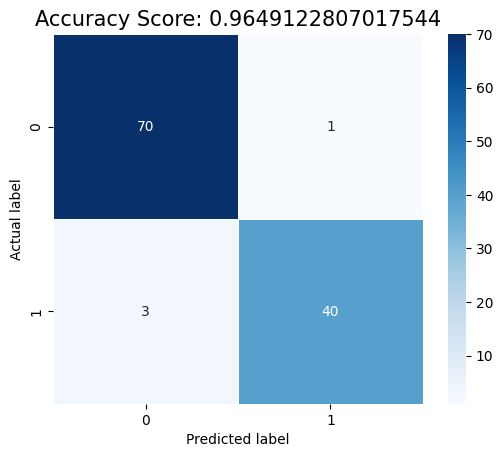

In [ ]:

clf = RandomForestClassifier(
    n_estimators=10,         # Number of trees in the forest
    max_depth=None,          # Maximum depth of the tree. If None, nodes are expanded until all leaves are pure or contain less than min_samples_split samples
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    max_features='sqrt',     # Number of features to consider when looking for the best split
    bootstrap=True,          # Whether bootstrap samples are used when building trees
    random_state=42          # Seed for the random number generator
)

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Using RandomForestClassifier")
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')
print('Confusion Matrix:')
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, square=True, cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size=15)
plt.show()


#hyperparameter tuning

Using hyperparameter tuning
Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 15}
Best model accuracy: 96.49%
Best model precision: 96.52%
Best model recall: 96.49%
Best model F1 score: 96.47%
Best model confusion matrix:
[[70  1]
 [ 3 40]]


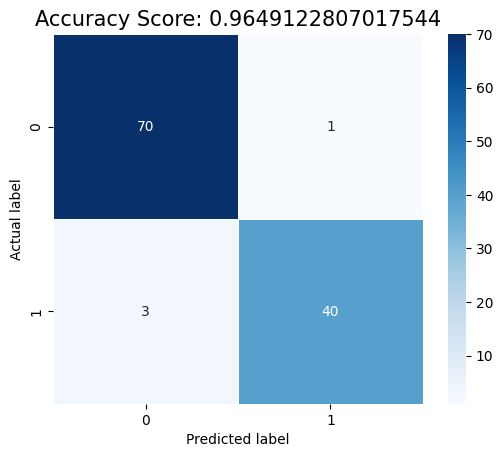

In [ ]:

# If you want to perform hyperparameter tuning, you can use GridSearchCV
# Define the parameter grid for GridSearchCV

print("Using hyperparameter tuning")
param_grid = {
    'n_estimators': [5, 10, 15],  # Different values for the number of decision trees
    'max_depth': [None, 10, 20, 30],  # Different values for the maximum depth
    'min_samples_split': [2, 5, 10],  # Different values for min samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],    # Different values for min samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Different values for number of features when looking for best split
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print(f'Best parameters: {grid_search.best_params_}')

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')
best_conf_matrix = confusion_matrix(y_test, y_pred_best)

print(f'Best model accuracy: {best_accuracy * 100:.2f}%')
print(f'Best model precision: {best_precision * 100:.2f}%')
print(f'Best model recall: {best_recall * 100:.2f}%')
print(f'Best model F1 score: {best_f1 * 100:.2f}%')
print('Best model confusion matrix:')
print(best_conf_matrix)


# Visualize the pruned decision tree
sns.heatmap(best_conf_matrix, annot=True, fmt="d", linewidths=0.5, square=True, cmap="Blues")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred_best))
plt.title(all_sample_title, size=15)
plt.show()

## Comparing SVM, Decision tree and Random **Forest**

In [ ]:
print(' SVM Accuracy  :', accuracy_score(y_test, svm_classifier.predict(X_test_scaled)))
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_classifier.predict(X_test)))
print('Random Forest Accuracy:', accuracy_score(y_test, clf.predict(X_test)))

 SVM Accuracy  : 0.9824561403508771
Decision Tree Accuracy: 0.9736842105263158
Random Forest Accuracy: 0.9649122807017544


# **Visualizing** **Prediction**

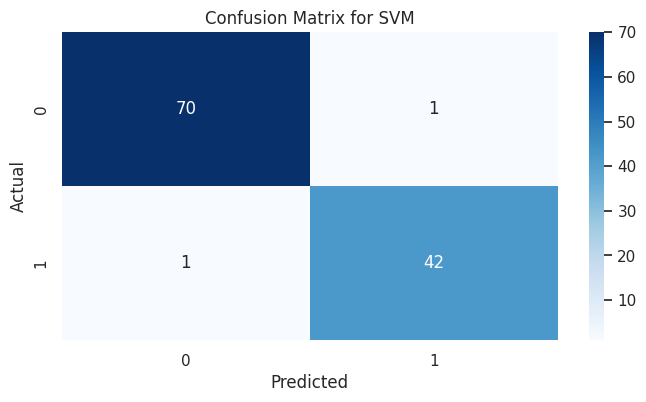

In [ ]:
#Plotting Actual Vs Prection of SVM
plt.figure(figsize=(8,4))
cm_svm = confusion_matrix(y_test, svm_classifier.predict(X_test_scaled))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

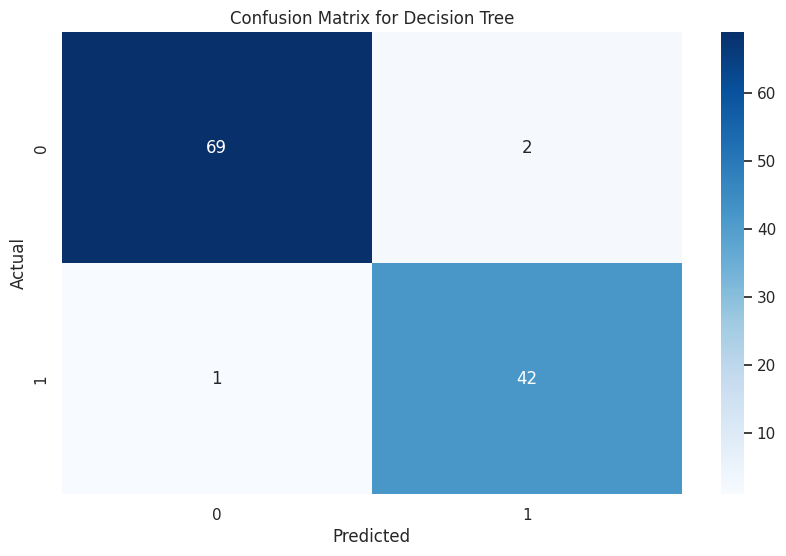

In [ ]:
#Plotting Actual Vs Prection of Decision Tree
plt.figure(figsize=(10, 6))
cm_svm = confusion_matrix(y_test, dt_classifier.predict(X_test))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

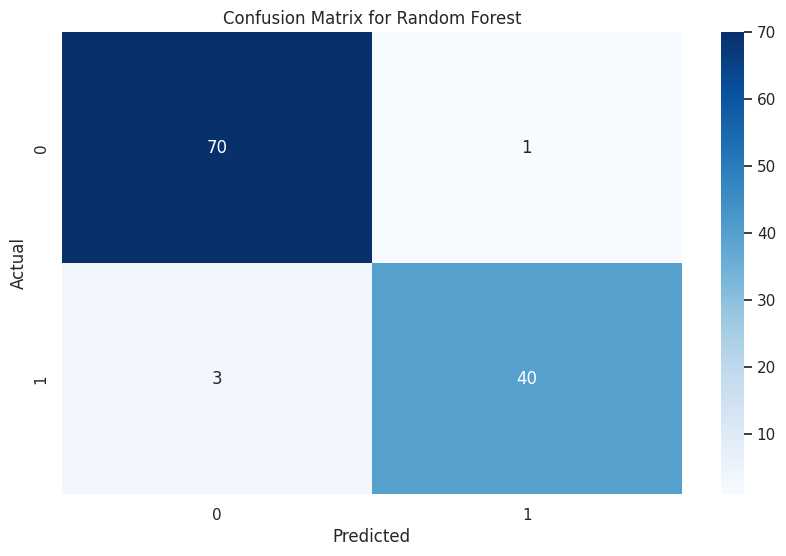

In [ ]:
# Plotting Actual Vs Predictions of Random forest
plt.figure(figsize=(10, 6))
cm_rf = confusion_matrix(y_test, clf.predict(X_test))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## **Result**

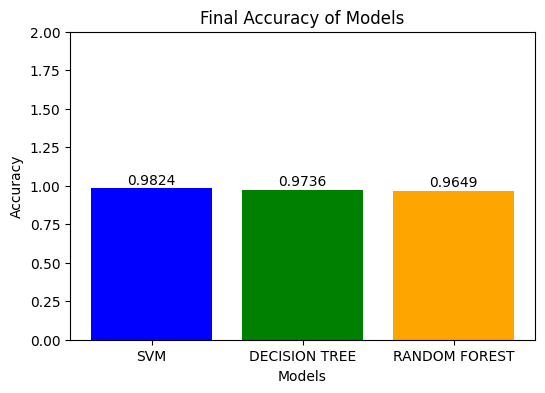

In [ ]:
accuracies = [0.9824, 0.9736,0.9649 ]  # Replace these with the actual accuracy values
models = ['SVM', 'DECISION TREE', 'RANDOM FOREST']

# Create the histogram plot
plt.figure(figsize=(6, 4))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Final Accuracy of Models')
plt.ylim(0, 2)
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f"{accuracy:.4f}", ha='center', va='bottom')